# Это первая модель в курсе по ML. Тут основные идеи того как устроен kNN и базовые аспекты для построения самих моделей ( разедение выборки, библиотеки, обучение и предикт модели) 

In [87]:
from sklearn.datasets import load_boston
from sklearn.datasets import make_moons         # datasets


from matplotlib import pyplot as plt
import numpy as np                             # standart libraries

from sklearn.model_selection import train_test_split    # split train and test

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier       # Regression model and Classificator ( import separately)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score              # Metrcics 

from sklearn.model_selection import GridSearchCV        # optimisator for choosing hyperparameters

In [8]:
data = load_boston()
print(data['DESCR'])
data['feature_names']

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

С помощью этой библиотеки можно брать датасеты для тренировок. Есть и другие но пока этой 

In [9]:
X, y = data['data'], data['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Text(0, 0.5, 'Price')

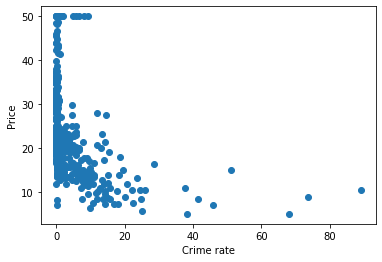

In [10]:
plt.scatter(X[:, 0], y)
plt.xlabel('Crime rate')
plt.ylabel('Price')

In [12]:
from sklearn.model_selection import train_test_split

С помощью функции `train_test_split` разобьем выборку на `train` и `test`.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

В sklearn, разные методы лежат в разных модулях. Например в linear_model находятся линейные модели, в neighbors - методы основанные на ближайших соседях.


Импортируем алгоритм knn из sklearn. Работа с алгоритмами машинного обучения в библиотеке состоит из трех этапов.



1.   Создание объекта, который будет реализовывать алгоритм.
2.   Вызов `fit`: обучение модели на тренировочной подвыборке
3.   Вызов `predict`: получение предсказаний на тестовой выборке

In [15]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p = 2)

p = 2 значит в качестве метрики используем евклидово расстояние. р = 1 - манхетанское 

In [16]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [17]:
predictions = knn.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(y_test, predictions)

57.10548235294115

Но мы тут гиперпараметры не настраивали, что важно. Так мы сможем уменьшить MSE

In [21]:
from sklearn.model_selection import GridSearchCV

Эта штука подбирает гиперпараметры. В нашем алгоритме мы хотим метрику расстояние, число соседей и необходимость весов узнать

In [26]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': range(1, 40, 2),
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5)

In [27]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

Параметр cv=5 говорит, что во время поиска оптимальных парамертов будет использоваться кросс-валидация с 5 фолдами. Давайте вспомним, что это такое: 

![alt text](https://miro.medium.com/max/700/1*rgba1BIOUys7wQcXcL4U5A.png)
https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

В нашем случае, выборка будет разделена на 5 частей и на каждой из 5 итераций, часть данных будет становиться тестовой выборкой, а другая часть - обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [28]:
grid_searcher.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [30]:
mean_squared_error(y_test, grid_searcher.predict(X_test)) 

38.989088856046735

УМЕНЬШИЛАСЬ!!!!

In [35]:
metrics = []

for n in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    metrics.append(mean_squared_error(y_test, knn.predict(X_test)))

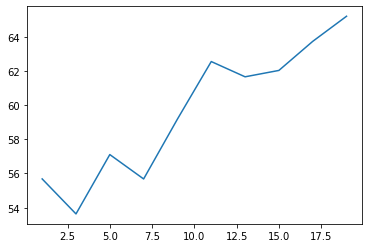

In [36]:
plt.plot(range(1, 20, 2), metrics)

Видно, что наилучшее кол-во соседей в районе `ТРЕХ`

# Теперь для задачи классификации Knn применим 

In [37]:
from sklearn.datasets import make_moons

In [39]:
X, y = make_moons()

In [40]:
X.shape

(100, 2)

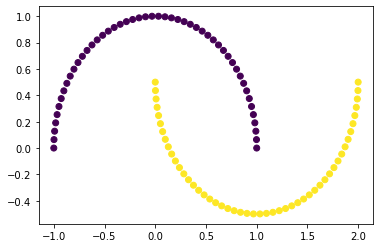

In [42]:
plt.scatter(X[:,0], X[:,1], c=y)

С таким очень легко справиться, поэтому добавим шума для усложнения 

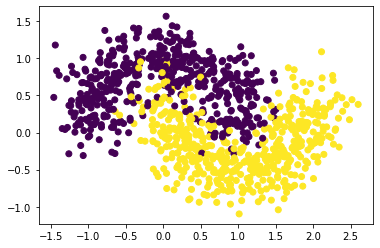

In [45]:
X, y = make_moons(n_samples=1000, noise = 0.25)
plt.scatter(X[:,0], X[:,1], c=y)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [83]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p = 2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test, pred)

0.925

## Тут уже метрикой точности мы используем не MSE а долю правильных ответов. У нас получилось 92.5%

In [53]:
import numpy as np

In [59]:
x_space = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(x_space, x_space)

Создали массив точек, чтобы пространство заполнить точками. Дальше будем это визуализировать 

In [62]:
xy = np.stack([x_grid, y_grid], axis = 2).reshape(-1,2)
xy

array([[-2.        , -2.        ],
       [-1.95959596, -2.        ],
       [-1.91919192, -2.        ],
       ...,
       [ 1.91919192,  2.        ],
       [ 1.95959596,  2.        ],
       [ 2.        ,  2.        ]])

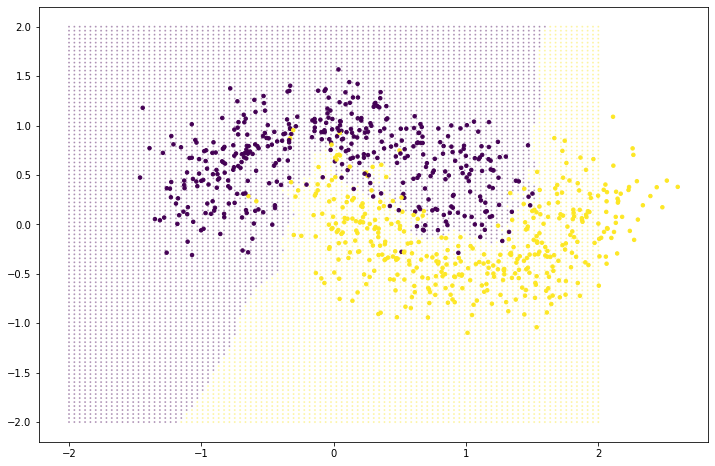

In [80]:
plt.figure(figsize=(12,8))
plt.scatter(xy[:, 0], xy[:, 1], 
            s=1, 
            alpha=0.3,
            c=knn.predict(xy))
plt.scatter(X_train[:,0], X_train[:,1], c = y_train, s = 12)

На картинке вы можете увидеть исходные данные и границу, которую knn возвел между классами. Поэксперементируйте с параметром n_neighbors и посмотрите, как он влияет на итоговый результат.